In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("C:/Users/KAGOWTH/Documents/Python Projects/basketball.csv")

In [6]:
df.describe()

,Height,Weight,Successful_Field_Goals,Successful_Free_Throws,Avg_Points
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,6.587037,209.907407,0.449111,0.741852,11.790741
std,0.458894,30.265036,0.056551,0.100146,5.899257
min,5.700000,105.000000,0.291000,0.244000,2.800000
25%,6.225000,185.000000,0.415250,0.713000,8.150000
50%,6.650000,212.500000,0.443500,0.753500,10.750000
75%,6.900000,235.000000,0.483500,0.795250,13.600000
max,7.600000,263.000000,0.599000,0.900000,27.400000


Text(0,0.5,'Count')

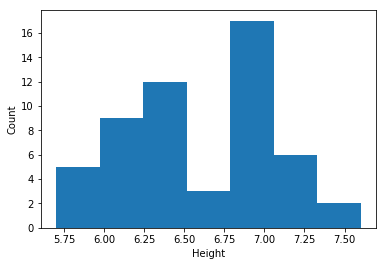

In [17]:
x = df['Height']
plt.hist(x, bins=7)
plt.xlabel('Height')
plt.ylabel('Count')


Text(0,0.5,'Count')

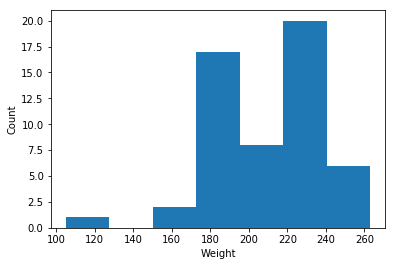

In [18]:
x = df['Weight']
plt.hist(x, bins=7)
plt.xlabel('Weight')
plt.ylabel('Count')

Text(0,0.5,'Count')

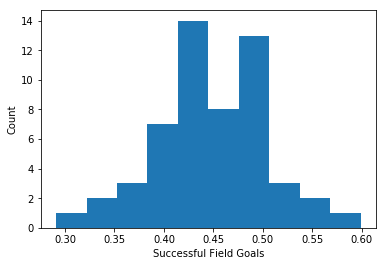

In [16]:
x = df['Successful_Field_Goals']
plt.hist(x, bins=10)
plt.xlabel('Successful Field Goals')
plt.ylabel('Count')

Text(0,0.5,'Count')

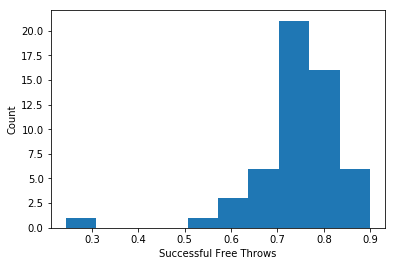

In [20]:
x = df['Successful_Free_Throws']
plt.hist(x, bins=10)
plt.xlabel('Successful Free Throws')
plt.ylabel('Count')

Text(0,0.5,'Count')

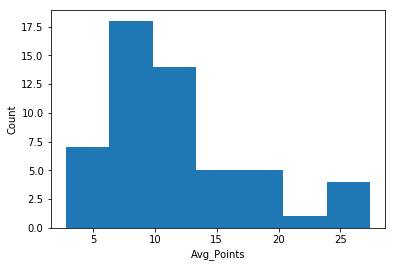

In [23]:
x = df['Avg_Points']
plt.hist(x, bins=7)
plt.xlabel('Avg_Points')
plt.ylabel('Count')

Text(0,0.5,'Successful_Field_Goals')

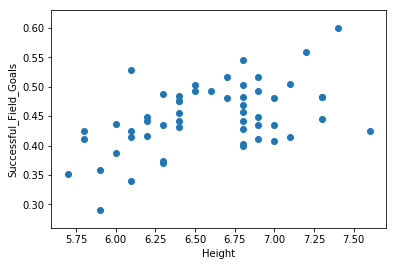

In [44]:
x = df ['Height']
plt.scatter(x,df['Successful_Field_Goals'])
plt.xlabel('Height')
plt.ylabel('Successful_Field_Goals')

Text(0,0.5,'Successful_Field_Goals')

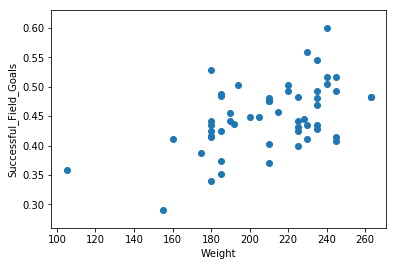

In [45]:
x = df ['Weight']
plt.scatter(x,df['Successful_Field_Goals'])
plt.xlabel('Weight')
plt.ylabel('Successful_Field_Goals')

Text(0.5,0,'Avg Points')

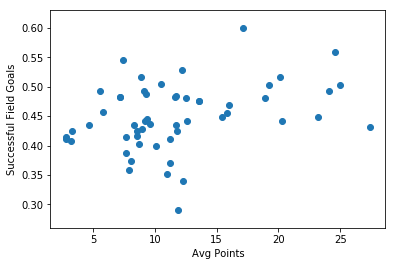

In [46]:
x = df ['Avg_Points']
plt.scatter(x,df['Successful_Field_Goals'])
plt.ylabel('Successful Field Goals')
plt.xlabel('Avg Points')

Text(0,0.5,'Successful Field Goals')

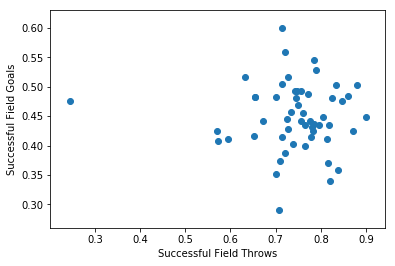

In [47]:
x = df ['Successful_Free_Throws']
plt.scatter(x,df['Successful_Field_Goals'])
plt.xlabel('Successful Field Throws')
plt.ylabel('Successful Field Goals')

                          Height    Weight  Successful_Field_Goals  \
Height                  1.000000  0.834324                0.495546   
Weight                  0.834324  1.000000                0.516051   
Successful_Field_Goals  0.495546  0.516051                1.000000   
Successful_Free_Throws -0.259271 -0.290159               -0.018570   
Avg_Points             -0.068906 -0.009844                0.338760   

                        Successful_Free_Throws  Avg_Points  
Height                               -0.259271   -0.068906  
Weight                               -0.290159   -0.009844  
Successful_Field_Goals               -0.018570    0.338760  
Successful_Free_Throws                1.000000    0.244852  
Avg_Points                            0.244852    1.000000  


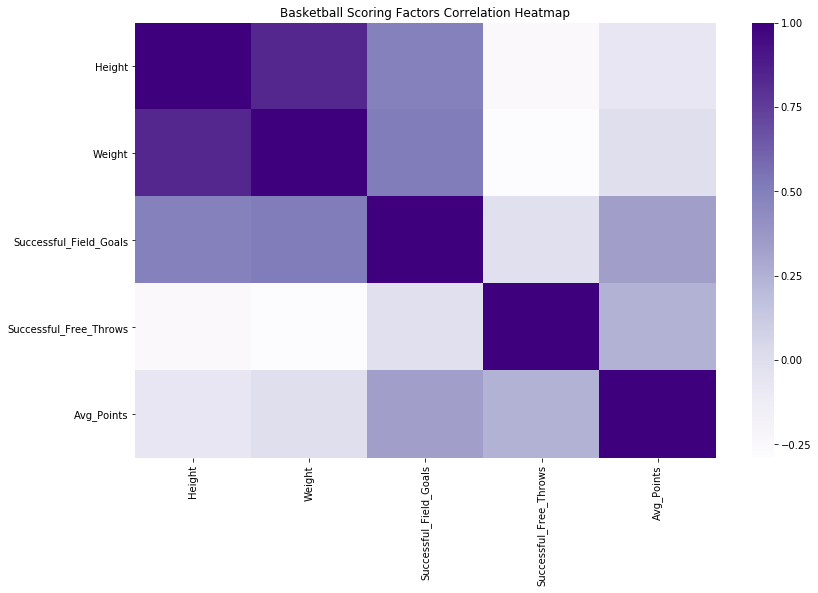

In [48]:
plt.subplots(figsize=(13,8))
ax = plt.axes()
ax.set_title("Basketball Scoring Factors Correlation Heatmap")
corr = df.corr()
print(corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Purples")
plt.show()

In [50]:
feature_cols = ['Height','Weight','Successful_Free_Throws','Avg_Points']
X = df [feature_cols]
Y = df ['Successful_Field_Goals']

In [54]:
from sklearn import linear_model,metrics
regr = linear_model.LinearRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
import statsmodels.api as sm
model = sm.OLS(Y_train, X_train).fit()
#predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Successful_Field_Goals   R-squared:                       0.991
Model:                                OLS   Adj. R-squared:                  0.990
Method:                     Least Squares   F-statistic:                     902.7
Date:                    Mon, 05 Nov 2018   Prob (F-statistic):           2.12e-32
Time:                            11:59:55   Log-Likelihood:                 62.381
No. Observations:                      36   AIC:                            -116.8
Df Residuals:                          32   BIC:                            -110.4
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Height                     0.0395      0.018      2.170      0.038       0.002       0.077
Weight                     0.0005      0.000      1.342      0.189      -0.000       0.001
Successful_Free_Throws     0.0276      0.074      0.374      0.711      -0.123       0.178
Avg_Points                 0.0047      0.002      3.078      0.004       0.002       0.008
==============================================================================
Omnibus:                        2.345   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.310   Jarque-Bera (JB):                1.246
Skew:                           0.363   Prob(JB):                        0.536
Kurtosis:                       3.552   Cond. No.                     2.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
feature_cols = ['Height','Avg_Points']
X = df [feature_cols]
Y = df ['Successful_Field_Goals']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
model = sm.OLS(Y_train, X_train).fit()
predictions = model.predict(X_test)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Successful_Field_Goals   R-squared:                       0.991
Model:                                OLS   Adj. R-squared:                  0.990
Method:                     Least Squares   F-statistic:                     1809.
Date:                    Mon, 05 Nov 2018   Prob (F-statistic):           2.98e-35
Time:                            12:02:25   Log-Likelihood:                 61.331
No. Observations:                      36   AIC:                            -118.7
Df Residuals:                          34   BIC:                            -115.5
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Height         0.0601      0.003     21.214      0.000       0.054       0.066
Avg_Points     0.0047      0.001      3.272      0.002       0.002       0.008
==============================================================================
Omnibus:                        2.747   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                1.635
Skew:                           0.238   Prob(JB):                        0.442
Kurtosis:                       3.929   Cond. No.                         5.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0,0.5,'Predicted')

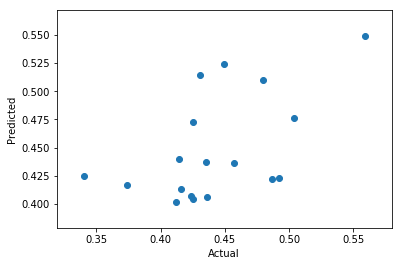

In [62]:
from  matplotlib import pyplot
pyplot.scatter(Y_test,predictions)
pyplot.xlabel('Actual')
pyplot.ylabel('Predicted')

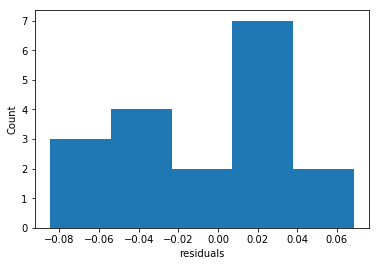

In [73]:
residuals = Y_test - predictions
plt.hist(residuals,bins=5)
plt.xlabel("residuals")
plt.ylabel("Count")
plt.show()

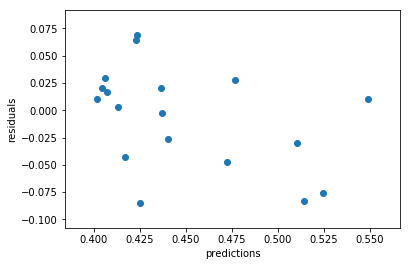

In [74]:
plt.scatter(predictions,residuals)
plt.xlabel("predictions")
plt.ylabel("residuals")
plt.show()

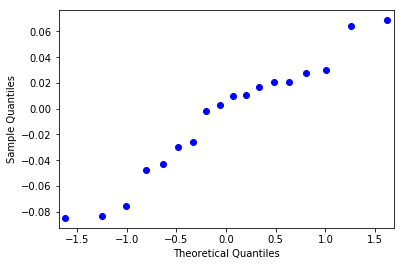

In [70]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals)
pyplot.show()

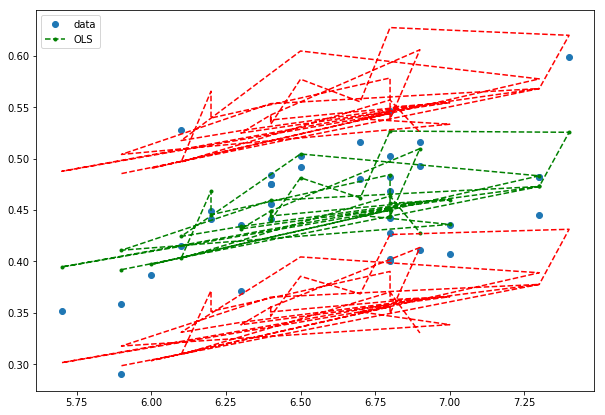

In [72]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(X_train['Height'], Y_train, 'o', label="data")
ax.plot(X_train['Height'], model.fittedvalues, 'g--.', label="OLS")
#ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(X_train['Height'], confidence_interval_upper, 'r--')
ax.plot(X_train['Height'], confidence_interval_lower, 'r--')
ax.legend(loc='best');
